In [13]:
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
import json
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [7]:
data = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')
camID = data['camId'].flatten()
filelist = data['filelist'].flatten()
gallery_idx = data['gallery_idx'].flatten()
labels = data['labels'].flatten()
query_idx = data['query_idx'].flatten()
train_idx = data['train_idx'].flatten()

print('camID:',camID.shape)
print('filelist:',filelist.shape)
print('gallery_idx:',gallery_idx.shape)
print('labels:',labels.shape)
print('query_idx:',query_idx.shape)
print('train_idx:',train_idx.shape)

camID: (14096,)
filelist: (14096,)
gallery_idx: (5328,)
labels: (14096,)
query_idx: (1400,)
train_idx: (7368,)


In [8]:
try:
    features = loadmat('PR_data/features.mat')
    features = features['features']
except FileNotFoundError:
    print('exception handling')
    with open('PR_data/feature_data.json','r')as f: 
        features = json.load(f) 
        features = np.asarray(features) # each row is a feature (data instance) print(features.shape)
print(features.shape)

MemoryError: 

In [9]:
features = np.asarray(features) # each row is a feature (data instance)
print(features.shape)

(14096, 2048)


In [10]:
train = features[train_idx-1]
scalar = StandardScaler().fit(train)
#train = StandardScaler().fit_transform(features[train_idx-1])
train = scalar.transform(train)
tLabels = labels[train_idx-1]
#query = features[query_idx-1]
query = scalar.transform(features[query_idx-1])
qLabels = labels[query_idx-1]
#gallery = features[gallery_idx-1]
gallery = scalar.transform(features[gallery_idx-1])
gLabels = labels[gallery_idx-1]
tID = camID[train_idx-1]
qID = camID[query_idx-1]
gID = camID[gallery_idx-1]

c = len(np.unique(tLabels)) #767
print(c)

print(len(train)-c) # 6601

767
6601


In [11]:
#dist = []
def kNN(k,query,qLabels,qID,gallery,gLabels,gID,metric):
    G = [] #list of lists, #list = #query imgs, length of each list = #gallery imgs used
    for i in range(len(query)):
        #indices for gallery features to use
        G.append([x for x in range(len(gallery)) if not(gLabels[x]==qLabels[i] and gID[x]==qID[i])]) 
    print('G')
    
    sorted_idx = []
    for i in range(len(query)):
        Dist = distance.cdist(np.reshape(query[i],(1,-1)),gallery[G[i]],metric = metric)
        sorted_idx.append(np.argsort(Dist))
    print('sorted_idx')

    def accuracy(k):
        NN = [arr[0,:k] for arr in sorted_idx]
        print('NN')

        sum = 0
        for i in range(len(query)):
            usedLabels = gLabels[G[i]] # labels of gallery images used for each query image
            if(qLabels[i] in usedLabels[NN[i]]): 
                sum += 1
        acc = sum/len(query)
        print('acc')
        
        return acc
    
    if type(k) is list:
        acc = []
        for n in k:
            acc.append(accuracy(n))
    else:
        acc = accuracy(k)
    
    return acc

print('working')

working


In [12]:
acc = kNN(k = [1,2,3,5,10,20,50,75,100],query=query,qLabels=qLabels,qID=qID,gallery=gallery,
          gLabels=gLabels,gID=gID,metric='euclidean')
print(acc)

G
sorted_idx
NN
acc
NN
acc
NN
acc
NN
acc
NN
acc
NN
acc
NN
acc
NN
acc
NN
acc
[0.47214285714285714, 0.5357142857142857, 0.5964285714285714, 0.6621428571428571, 0.7371428571428571, 0.8157142857142857, 0.8878571428571429, 0.9235714285714286, 0.9428571428571428]


Text(0, 0.5, 'Accuracy')

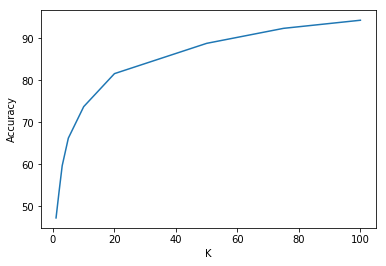

In [16]:
plt.plot([1,2,3,5,10,20,50,75,100], [a*100 for a in acc])
plt.xlabel('K')
plt.ylabel('Accuracy')